In [ ]:
# %pip install --upgrade chromadb
# %pip install pillow
# %pip install open-clip-torch
# %pip install matplotlib

In [20]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [ ]:
# Create database file at folder "my_vectordb" or load into client if exists.
chroma_client = chromadb.PersistentClient(path="my_vectordb")

# Instantiate image loader helper.
image_loader = ImageLoader()

# Instantiate multimodal embedding function.
multimodal_ef = OpenCLIPEmbeddingFunction()

# Create the collection, aka vector database. Or, if database already exist, then use it. Specify the model that we want to use to do the embedding.
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef, data_loader=image_loader)


In [34]:
# Use .add() to add a new record or .update() to update existing record
multimodal_db.update(
    ids=['0', '1'], 
    uris=['images/lion.jpg', 'images/tiger.jpg'],
    metadatas=[{'img_category':'animals'}, {'img_category':'animals'}]
)

In [ ]:
# Check record count
multimodal_db.count()

In [21]:
# Simple function to print the results of a query.
# The 'results' is a dict {ids, distances, data, ...}
# Each item in the dict is a 2d list.
def print_query_results(query_list: list, query_results: dict)->None:
    result_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')

        for j in range(result_count):
            id       = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data     = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri      = query_results['uris'][i][j]

            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}') 

            # Display image, the physical file must exist at URI.
            # (ImageLoader loads the image from file)
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

In [32]:
# Use .add() to add a new record or .update() to update existing record
multimodal_db.update(
    ids=[
        'E23',
        'E25', 
        'E33',
    ],
    uris=[
        'images/E23-2.jpg',
        'images/E25-2.jpg', 
        'images/E33-2.jpg',
    ],
    metadatas=[
        {"item_id":'E23', 'img_category':'food', 'item_name':'Braised Fried Tofu with Greens'},
        {"item_id":'E25', 'img_category':'food', 'item_name':'Sauteed Assorted Vegetables'},
        {"item_id":'E33', 'img_category':'food', 'item_name':'Kung Pao Tofu'},
    ]
)

Results for query: carrot
id: E23, distance: 1.576844015297212, metadata: {'img_category': 'food', 'item_id': 'E23', 'item_name': 'Braised Fried Tofu with Greens'}, document: None
data: images/E23-2.jpg


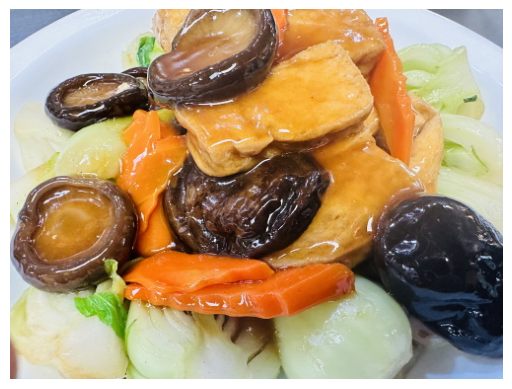

id: E25, distance: 1.5883670811631345, metadata: {'img_category': 'food', 'item_id': 'E25', 'item_name': 'Sauteed Assorted Vegetables'}, document: None
data: images/E25-2.jpg


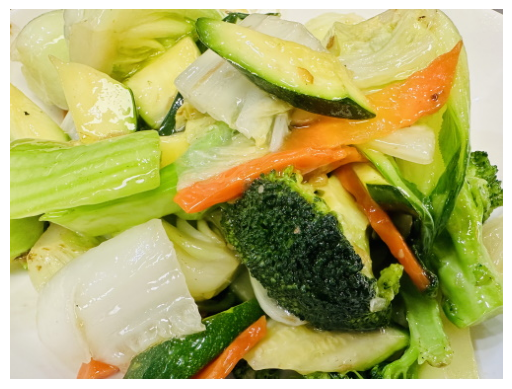

id: E33, distance: 1.7238312092003751, metadata: {'img_category': 'food', 'item_id': 'E33', 'item_name': 'Kung Pao Tofu'}, document: None
data: images/E33-2.jpg


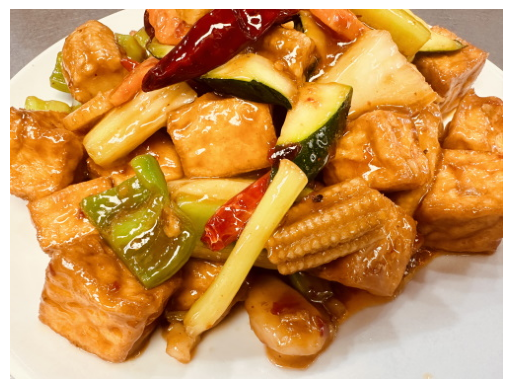

In [39]:
# It is possible to submit multiple queries at the same time, just add to the list.  
query_texts = ['carrot']

# Query vector db
query_results = multimodal_db.query(
    query_texts = query_texts,
    n_results=5,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'food'}
)

print_query_results(query_texts, query_results)